In [15]:
import pandas as pd
df=pd.read_csv("df_train_corr.csv")
s=df.columns
df# saco csv

,id,laptop_ID,Inches,Ram,Weight,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,...,INTEL_Xeon,Marca_GPU_NVIDIA,Marca_GPU_AMD,Marca_GPU_INTEL,NVIDIA_GEFORCE,NVIDIA_Quadro,NVIDIA_GTX,GPU_AMD_R,Intel_Iris,Price_euros
0,268,1002,15.6,8,2.36,False,False,False,True,False,...,0,0,1,0,0,0,0,7,0,749.00
1,347,867,15.6,4,2.00,False,True,False,False,False,...,0,0,0,1,0,0,0,0,0,449.00
2,353,966,13.3,8,1.20,False,False,False,False,False,...,0,0,0,1,0,0,0,0,0,1460.00
3,578,767,15.6,16,4.42,False,False,False,True,False,...,0,1,0,0,1,0,1,0,0,2868.99
4,42,1241,12.5,8,1.26,False,False,False,True,False,...,0,0,0,1,0,0,0,0,0,1713.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,89,973,11.6,4,1.25,False,False,False,False,False,...,0,0,0,1,0,0,0,0,0,389.00
908,716,1018,13.3,4,1.20,False,False,False,False,False,...,0,0,0,1,0,0,0,0,0,1195.00
909,517,1071,15.6,8,2.40,False,False,False,False,False,...,0,0,1,0,0,0,0,5,0,449.00
910,891,965,14.0,8,1.36,False,False,False,True,False,...,0,0,0,1,0,0,0,0,0,1775.00


<Axes: >

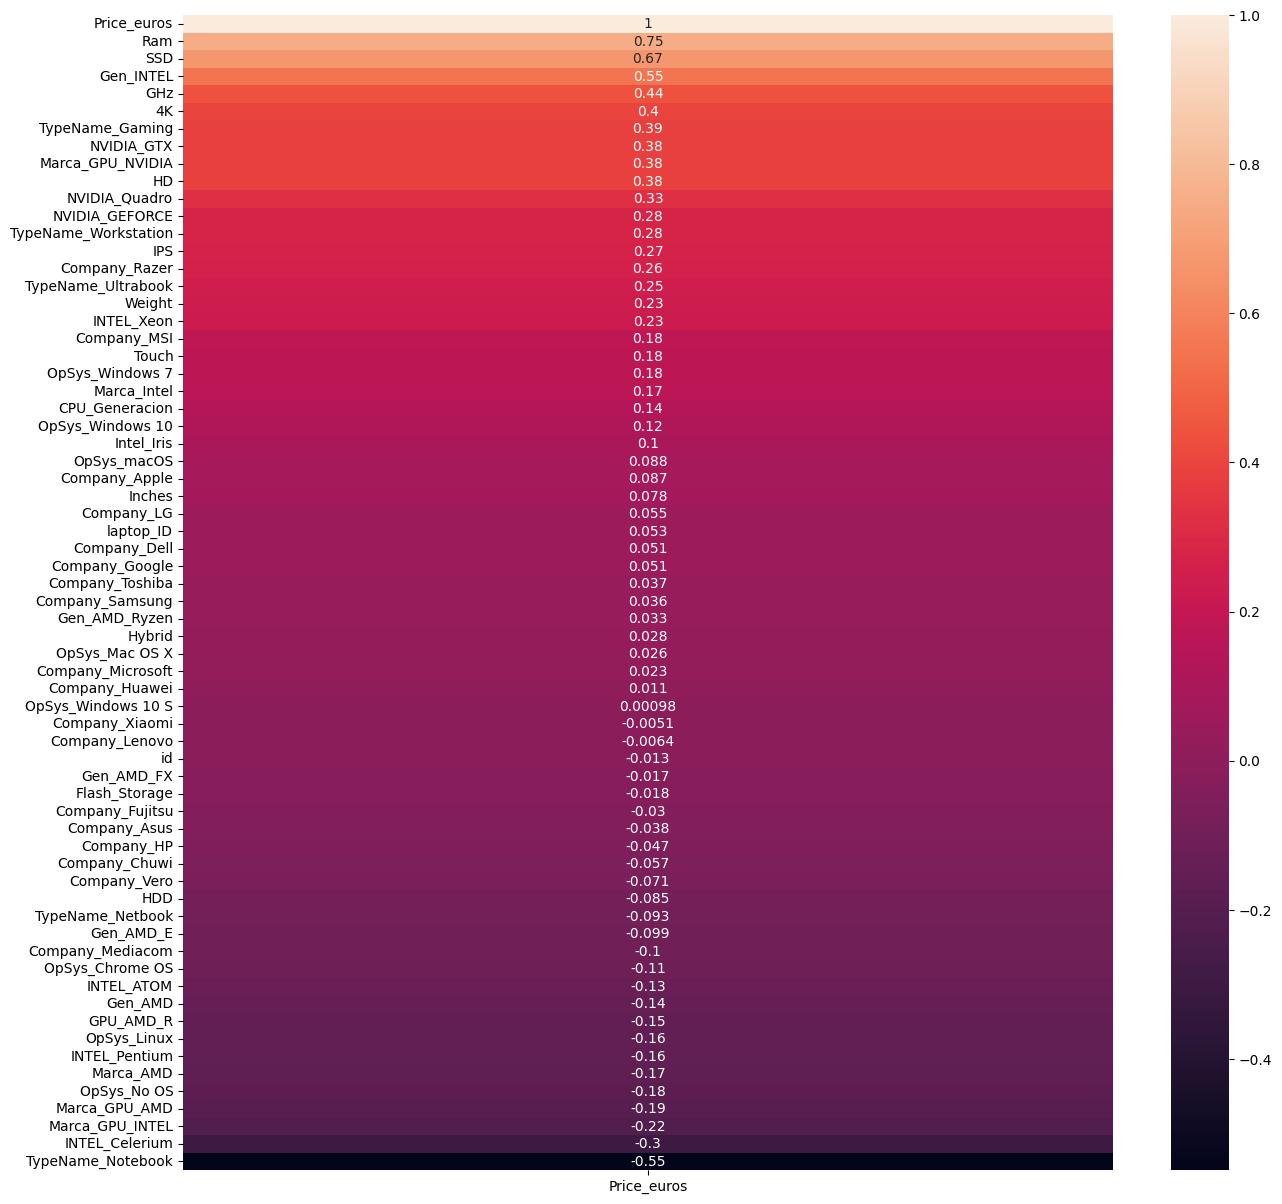

In [16]:
import seaborn as sns

import matplotlib.pyplot as plt
corr=df.corr()[['Price_euros']]
corr
plt.figure(figsize=(15,15))
sns.heatmap(corr[['Price_euros']].sort_values(by='Price_euros', ascending=False), annot=True)
# miro la correlacion dcon los euros

In [17]:
s

Index(['id', 'laptop_ID', 'Inches', 'Ram', 'Weight', 'Company_Apple',
       'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu',
       'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG',
       'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'OpSys_Chrome OS', 'OpSys_Linux',
       'OpSys_Mac OS X', 'OpSys_No OS', 'OpSys_Windows 10',
       'OpSys_Windows 10 S', 'OpSys_Windows 7', 'OpSys_macOS', 'Touch', 'IPS',
       '4K', 'HD', 'HDD', 'SSD', 'Flash_Storage', 'Hybrid', 'GHz',
       'Marca_Intel', 'Marca_AMD', 'CPU_Generacion', 'Gen_AMD', 'Gen_AMD_E',
       'Gen_AMD_Ryzen', 'Gen_AMD_FX', 'Gen_INTEL', 'INTEL_ATOM',
       'INTEL_Celerium', 'INTEL_Pentium', 'INTEL_Xeon', 'Marca_GPU_NVIDIA',
       'Marca_GPU_AMD'

In [18]:
len(s)

66

In [19]:
corr[corr["Price_euros"].abs()>0.14].index
# solo saco las columnas de mas de 0,2

Index(['Ram', 'Weight', 'Company_MSI', 'Company_Razer', 'TypeName_Gaming',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Linux', 'OpSys_No OS', 'OpSys_Windows 7', 'Touch', 'IPS', '4K',
       'HD', 'SSD', 'GHz', 'Marca_Intel', 'Marca_AMD', 'Gen_INTEL',
       'INTEL_Celerium', 'INTEL_Pentium', 'INTEL_Xeon', 'Marca_GPU_NVIDIA',
       'Marca_GPU_AMD', 'Marca_GPU_INTEL', 'NVIDIA_GEFORCE', 'NVIDIA_Quadro',
       'NVIDIA_GTX', 'GPU_AMD_R', 'Price_euros'],
      dtype='object')

In [20]:
Feeatures=[ 'Ram', 'Weight', 'Company_Razer', 'TypeName_Gaming',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'IPS', '4K', 'SSD', 'GHz', 'Gen_INTEL', 'INTEL_Celerium', 'INTEL_Xeon',
       'Marca_GPU_NVIDIA', 'Marca_GPU_INTEL', 'NVIDIA_GEFORCE',
       'NVIDIA_Quadro', 'NVIDIA_GTX']
X=df[Feeatures]
# X=df.drop("Price_euros", axis=1)
y=df["Price_euros"]
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 24)


In [21]:
len(Feeatures)

19

In [22]:
import sklearn
from sklearn.cross_decomposition import PLSRegression
#importo
# saco una ecuacion
pls2=sklearn.cross_decomposition.PLSRegression(n_components=6,  scale=True, max_iter=500, tol=1e-06, copy=True)
pls2.fit(X, y)

y_pred = pls2.predict(X_test)


In [23]:
y_pred.shape

(183,)

R2 train 0.7929209526898885
R2 test 0.7370085811761116
cross_val 0.760612509990964


np.float64(259.14395750624425)

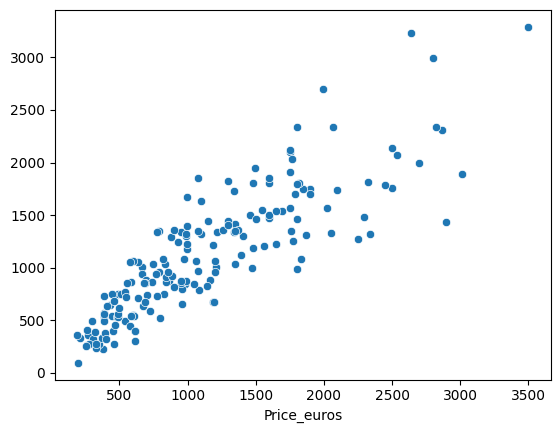

In [24]:
import seaborn as sns
sns.scatterplot( x=y_test,y= y_pred)
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error
import numpy as np

print("R2 train", pls2.score(X_train, y_train))
print("R2 test",pls2.score(X_test, y_test))
print("cross_val", cross_validate(pls2, X_train, y_train, cv=5)["test_score"].mean())
mean_absolute_error(y_test, y_pred)

In [25]:
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

trace1 = go.Scatter(
                    x =y_test ,
                    y = y_pred,
                    name = 'citations',
                    mode= "markers",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))
data = [trace1]

layout = dict(title = "Modelo lineal",
             xaxis= dict(title= 'Precio real',ticklen= 5),
            yaxis= dict(title= 'Precio estimado',ticklen= 5)
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)

In [26]:
df_test=pd.read_csv("df_test_corr.csv")

In [27]:
y_res=pls2.predict(df_test[Feeatures])
y_res.round(2)

array([2479.48,  772.66,  555.1 ,  999.76, 1069.36, 1863.08, 2860.43,
        516.23, 4947.63, 1297.82, 1560.9 ,  502.87,  303.71,  600.83,
        539.69,  912.13,  536.57, 1292.33, 1254.15, 1686.77, 1477.67,
        667.85, 1391.99, 1365.29, 1823.85,  373.86,  765.37,  313.09,
       1219.99,  401.06, 1017.67, 1059.16, 1718.88,  528.95,  438.07,
       1831.56,  851.22,  918.32, 2790.94,  537.7 ,  638.23,  903.7 ,
       1527.07, 1823.73, 1168.87, 1754.83,  642.09, 2981.05,  279.98,
       1562.44, 1156.44,  750.61,  948.83,  385.38, 1293.01,  576.77,
        714.97,  177.39, 1024.7 , 1266.84, 1544.65, 1097.43,  588.71,
       1165.47, 1095.89, 1540.65,  572.43, 1829.65,  414.93, 2038.59,
        872.88, 2764.83, 2051.47, 1191.66, 1047.02, 1086.53, 1082.14,
        406.46, 1020.89,  886.22,  503.83, 2045.67, 1410.64,  626.68,
       1291.72, 1478.97, 1816.15,  595.89, 2691.54,  622.73,  604.68,
        555.1 , 1266.84, 1204.56, 2602.72,  585.92, 1749.43, 1158.35,
       1036.16, 1066

In [28]:
respuesta=pd.DataFrame(df_test["id"])
respuesta["Price_euros"]=y_res.round(2)
respuesta

,id,Price_euros
0,181,2479.48
1,708,772.66
2,862,555.10
3,1064,999.76
4,702,1069.36
...,...,...
386,1281,1444.81
387,524,2106.27
388,1015,647.67
389,1236,230.48


In [ ]:
"""respuesta.to_csv("respuesta_regresion.csv", sep=",", index=False)"""